In [49]:
import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier


In [50]:
# Load and detect encoding
with open("E:/New_folder/sms spam/spam.csv", 'rb') as file:
    result = chardet.detect(file.read())
data_encoding = result['encoding']

In [51]:
# Load the dataset with the detected encoding
df = pd.read_csv("E:/New_folder/sms spam/spam.csv", encoding=data_encoding)

In [52]:
# Data cleaning and preprocessing
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.rename(columns={'v1': 'target', 'v2': 'message'}, inplace=True)
df['target'] = df['target'].map({'ham': 0, 'spam': 1})

In [53]:
# Remove duplicates
df.drop_duplicates(inplace=True)

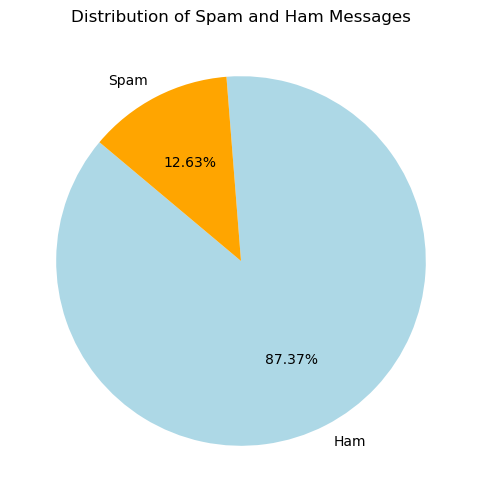

In [54]:
# Visualize class distribution
class_counts = df['target'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['Ham', 'Spam'], autopct='%1.2f%%', startangle=140, colors=['lightblue', 'orange'])
plt.title('Distribution of Spam and Ham Messages')
plt.show()

In [55]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Padma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Padma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
# Feature engineering: number of characters, words, and sentences
df['char_count'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))
df['sentence_count'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [57]:
# Descriptive statistics for ham and spam messages
print(df.groupby('target')[['char_count', 'word_count', 'sentence_count']].describe())


       char_count                                                           \
            count        mean        std   min    25%    50%    75%    max   
target                                                                       
0          4516.0   70.459256  56.358207   2.0   34.0   52.0   90.0  910.0   
1           653.0  137.891271  30.137753  13.0  132.0  149.0  157.0  224.0   

       word_count             ...              sentence_count            \
            count       mean  ...   75%    max          count      mean   
target                        ...                                         
0          4516.0  17.123782  ...  22.0  220.0         4516.0  1.820195   
1           653.0  27.667688  ...  32.0   46.0          653.0  2.970904   

                                            
             std  min  25%  50%  75%   max  
target                                      
0       1.383657  1.0  1.0  1.0  2.0  38.0  
1       1.488425  1.0  2.0  3.0  4.0   9.0  

[2 rows

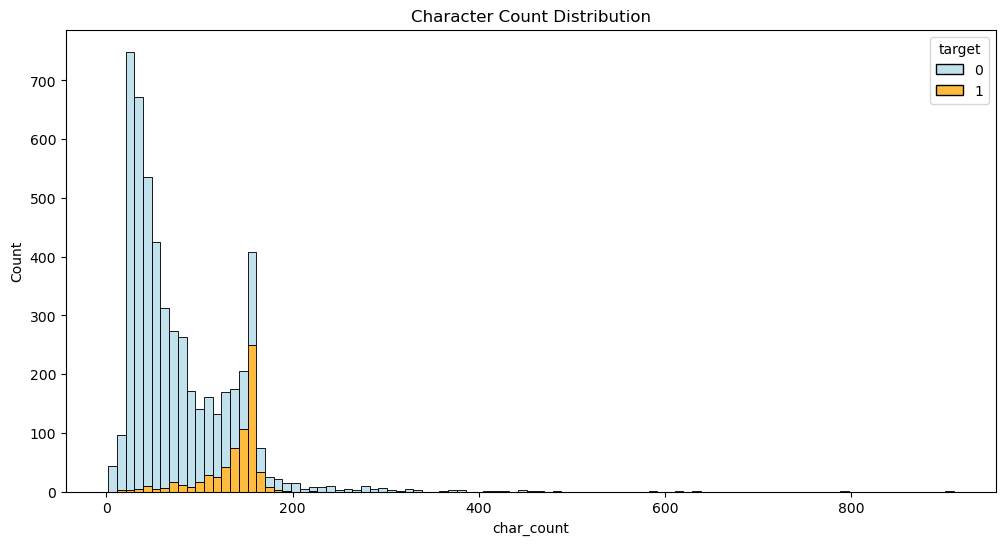

In [58]:
# Visualize distributions of features
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='char_count', hue='target', multiple='stack', palette=['lightblue', 'orange'])
plt.title('Character Count Distribution')
plt.show()

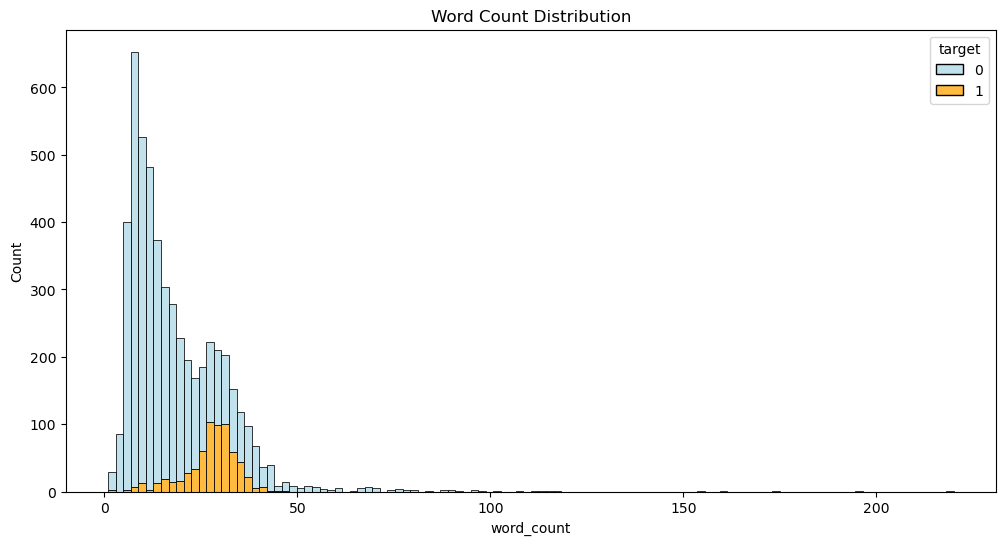

In [59]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='word_count', hue='target', multiple='stack', palette=['lightblue', 'orange'])
plt.title('Word Count Distribution')
plt.show()

In [60]:
# Text preprocessing function
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove non-alphanumeric tokens
    tokens = [word for word in tokens if word.isalnum()]
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    # Apply stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    return ' '.join(tokens)

In [61]:
# Apply text preprocessing
df['processed_message'] = df['message'].apply(preprocess_text)

In [62]:
# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['processed_message']).toarray()
y = df['target']


In [63]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [64]:
# Function to train and evaluate a classifier
def evaluate_classifier(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("")

In [65]:
# Naive Bayes classifiers
print("Gaussian Naive Bayes:")
evaluate_classifier(GaussianNB(), X_train, y_train, X_test, y_test)

Gaussian Naive Bayes:
Accuracy: 0.8694
Precision: 0.5068
Confusion Matrix:
[[788 108]
 [ 27 111]]



In [66]:
print("Multinomial Naive Bayes:")
evaluate_classifier(MultinomialNB(), X_train, y_train, X_test, y_test)

Multinomial Naive Bayes:
Accuracy: 0.9710
Precision: 1.0000
Confusion Matrix:
[[896   0]
 [ 30 108]]



In [67]:
print("Bernoulli Naive Bayes:")
evaluate_classifier(BernoulliNB(), X_train, y_train, X_test, y_test)

Bernoulli Naive Bayes:
Accuracy: 0.9836
Precision: 0.9919
Confusion Matrix:
[[895   1]
 [ 16 122]]



In [68]:
# Other classifiers
models = {
    'SVC': SVC(kernel='sigmoid', gamma=1.0, probability=True),
    'Logistic Regression': LogisticRegression(solver='liblinear', penalty='l1'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=50, random_state=2),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=2),
    'Bagging': BaggingClassifier(n_estimators=50, random_state=2),
    'Extra Trees': ExtraTreesClassifier(n_estimators=50, random_state=2),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, random_state=2)
}

In [69]:
# Evaluate each model
for model_name, model in models.items():
    print(model_name)
    evaluate_classifier(model, X_train, y_train, X_test, y_test)


SVC
Accuracy: 0.9758
Precision: 0.9748
Confusion Matrix:
[[893   3]
 [ 22 116]]

Logistic Regression
Accuracy: 0.9584
Precision: 0.9703
Confusion Matrix:
[[893   3]
 [ 40  98]]

K-Nearest Neighbors
Accuracy: 0.9052
Precision: 1.0000
Confusion Matrix:
[[896   0]
 [ 98  40]]

Decision Tree
Accuracy: 0.9275
Precision: 0.8119
Confusion Matrix:
[[877  19]
 [ 56  82]]

Random Forest
Accuracy: 0.9758
Precision: 0.9829
Confusion Matrix:
[[894   2]
 [ 23 115]]

AdaBoost


C:\Users\Padma\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9603
Precision: 0.9292
Confusion Matrix:
[[888   8]
 [ 33 105]]

Bagging
Accuracy: 0.9584
Precision: 0.8682
Confusion Matrix:
[[879  17]
 [ 26 112]]

Extra Trees
Accuracy: 0.9749
Precision: 0.9746
Confusion Matrix:
[[893   3]
 [ 23 115]]

Gradient Boosting
Accuracy: 0.9468
Precision: 0.9192
Confusion Matrix:
[[888   8]
 [ 47  91]]



In [70]:
# Voting classifier
voting_clf = VotingClassifier(estimators=[
    ('svc', models['SVC']),
    ('mnb', MultinomialNB()),
    ('etc', models['Extra Trees'])
], voting='soft')
print("Voting Classifier:")
evaluate_classifier(voting_clf, X_train, y_train, X_test, y_test)


Voting Classifier:
Accuracy: 0.9816
Precision: 0.9917
Confusion Matrix:
[[895   1]
 [ 18 120]]



In [71]:
# Stacking classifier
stacking_clf = StackingClassifier(estimators=[
    ('svc', models['SVC']),
    ('mnb', MultinomialNB()),
    ('etc', models['Extra Trees'])
], final_estimator=RandomForestClassifier())
print("Stacking Classifier:")
evaluate_classifier(stacking_clf, X_train, y_train, X_test, y_test)

Stacking Classifier:
Accuracy: 0.9807
Precision: 0.9470
Confusion Matrix:
[[889   7]
 [ 13 125]]

